<a href="https://colab.research.google.com/github/Vanitharavi245/PRODIGY_ML_TaskNumber-2/blob/main/K_means_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading Data
# Replace 'your_data.csv' with your actual data file
df = pd.read_csv('/content/Mall_Customers.csv')

# Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000         

##K-Means Clustering

In [ ]:
# K-Means Clustering

# Selecting Features for Clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

##Elbow Diagram

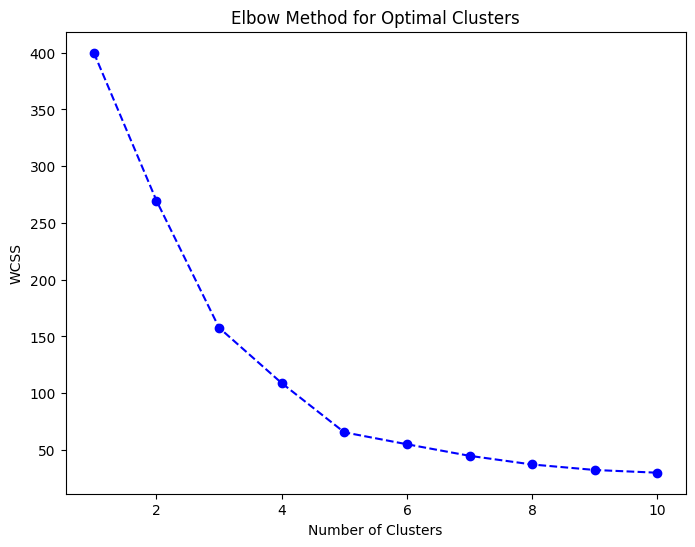

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


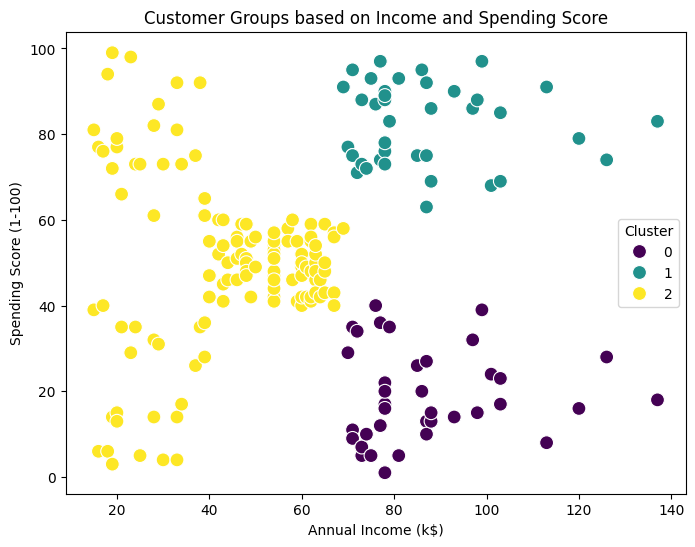

In [ ]:

# Applying K-Means with the optimal number of clusters (e.g., 5 clusters)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='viridis', s=100)
plt.title('Customer Groups based on Income and Spending Score')
plt.show()

##Summary of Cluster Data

In [ ]:
# Cluster Centers
print("\nCluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Summary of Clustered Data
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())


Cluster Centers:
[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]

Cluster Distribution:
Cluster
2    123
1     39
0     38
Name: count, dtype: int64


##Inference

1. Cluster 0 : Customers with high income but low spending scores ( Income of $87K, spending score is 18.6) . It has 38 customers.

2. Cluster 1: Customer with high income and high Spending Scores. ( Income of $86.5K, Spending Score is 82.1). It has only 39 customers are there.

3. Cluster 2: Customer with moderate income and spending scores (Income of $44.2K, Spending Score is 49.8). More customers falls into this clusters


##Interpretation

The customers earn well but are conservative spenders- Cluster 0

High earners who are also frequent or significant spenders- Cluster 1

Middle income customers with moderate spending behavior - Cluster 2


